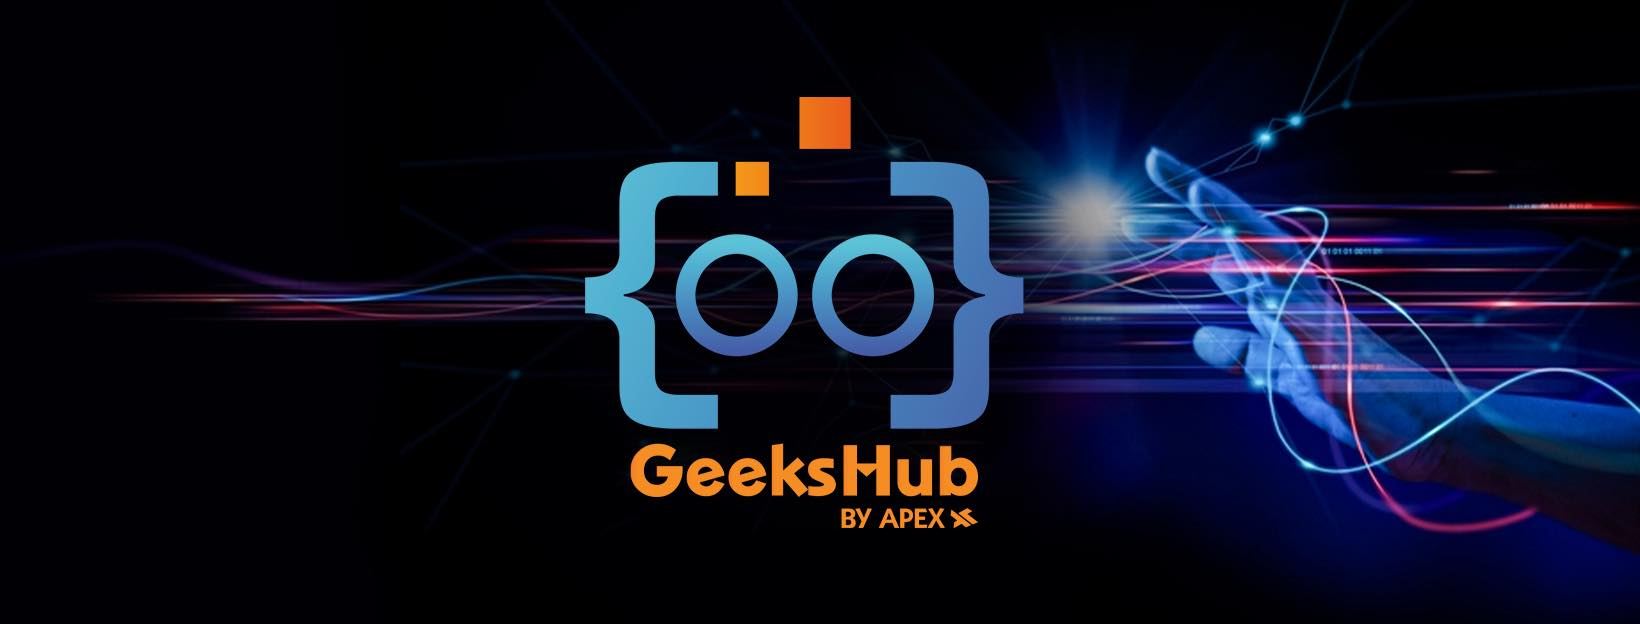

# Ensemble Models 
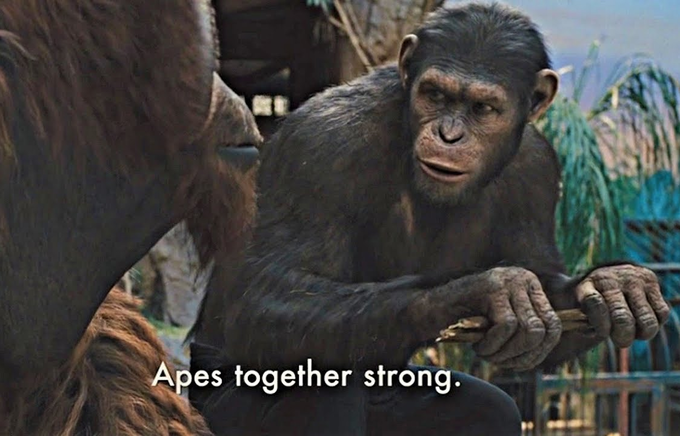


There is a theory that if you ask an enough number people a question their combined answer would be similar or even better than expert , this is called the wisdom of the crowd..This is exactly what ensemble models are all about, It is combined the decision of multiple models to produce one output.

In this notebook we will discuss the different types of ensemble models we can work with

**highly recommend to read Hands-on ML using Scikit-learn and Tensoflow Chapter 7**

In [1]:
#imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score,log_loss
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier

In [2]:
## getting data ready 
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isna().sum()/len(data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
## solving the problems quickly 


##wrong datatype 
data[["SibSp","Parch"]]=data[["SibSp","Parch"]].astype(int)


##unnecessary columns 
data.drop(["PassengerId","Ticket","Name"],axis=1,inplace=True)
data.drop("Cabin",axis=1,inplace=True)

##splitting data
x=data.loc[:,data.columns!="Survived"]
y=data.Survived

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print(len(x_train))


x_train

712


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S
270,1,male,NaN,0,0,31.0000,S
860,3,male,41.0,2,0,14.1083,S
435,1,female,14.0,1,2,120.0000,S


In [6]:
## missing imputation
imputer=SimpleImputer(strategy="most_frequent")
imputer.fit(np.array(x_train["Embarked"]).reshape(-1,1))
x_train["Embarked"]=imputer.transform(np.array(x_train["Embarked"]).reshape(-1,1))
x_test["Embarked"]=imputer.transform(np.array(x_test["Embarked"]).reshape(-1,1))

imputer=SimpleImputer(strategy="mean")
imputer.fit(np.array(x_train["Age"]).reshape(-1,1))
x_train["Age"]=imputer.transform(np.array(x_train["Age"]).reshape(-1,1))
x_test["Age"]=imputer.transform(np.array(x_test["Age"]).reshape(-1,1))

x_train






,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.500000,0,0,28.5000,S
733,2,male,23.000000,0,0,13.0000,S
382,3,male,32.000000,0,0,7.9250,S
704,3,male,26.000000,1,0,7.8542,S
813,3,female,6.000000,4,2,31.2750,S
...,...,...,...,...,...,...,...
106,3,female,21.000000,0,0,7.6500,S
270,1,male,29.498846,0,0,31.0000,S
860,3,male,41.000000,2,0,14.1083,S
435,1,female,14.000000,1,2,120.0000,S


In [7]:
##scaling numeric 

numerical=["Age","Fare","SibSp","Parch","Pclass"]
scaler=MinMaxScaler()
scaler.fit(x_train[numerical])
x_train[numerical]=scaler.transform(x_train[numerical])
x_test[numerical]=scaler.transform(x_test[numerical])
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,0.0,male,0.566474,0.000,0.000000,0.055628,S
733,0.5,male,0.283740,0.000,0.000000,0.025374,S
382,1.0,male,0.396833,0.000,0.000000,0.015469,S
704,1.0,male,0.321438,0.125,0.000000,0.015330,S
813,1.0,female,0.070118,0.500,0.333333,0.061045,S
...,...,...,...,...,...,...,...
106,1.0,female,0.258608,0.000,0.000000,0.014932,S
270,0.0,male,0.365404,0.000,0.000000,0.060508,S
860,1.0,male,0.509927,0.250,0.000000,0.027538,S
435,0.0,female,0.170646,0.125,0.333333,0.234224,S


In [8]:
def cat_encode(cat,x):
    for col in cat:
        temp=pd.get_dummies(x[col],drop_first=True)
        col_rename={}
        for i in temp.columns:
            col_rename[i]=f"{col}_{i}"
        temp.rename(columns=col_rename,inplace=True)
        x=pd.concat([x,temp],axis=1)
        x.drop(col,axis=1,inplace=True)
    return x 

x_train=cat_encode(["Sex","Embarked"],x_train)
x_test=cat_encode(["Sex","Embarked"],x_test)
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,0.0,0.566474,0.000,0.000000,0.055628,1,0,1
733,0.5,0.283740,0.000,0.000000,0.025374,1,0,1
382,1.0,0.396833,0.000,0.000000,0.015469,1,0,1
704,1.0,0.321438,0.125,0.000000,0.015330,1,0,1
813,1.0,0.070118,0.500,0.333333,0.061045,0,0,1
...,...,...,...,...,...,...,...,...
106,1.0,0.258608,0.000,0.000000,0.014932,0,0,1
270,0.0,0.365404,0.000,0.000000,0.060508,1,0,1
860,1.0,0.509927,0.250,0.000000,0.027538,1,0,1
435,0.0,0.170646,0.125,0.333333,0.234224,0,0,1


In [9]:
x_train.to_csv("train.csv",index=False)
y_train.to_csv("y_train.csv",index=False)

In [10]:
x_test.to_csv("test.csv",index=False)
y_test.to_csv("y_test.csv",index=False)

## A bunch of baseline models 

In [18]:
## the regular for loop 
models={"KNN":KNeighborsClassifier(),"SVC":SVC(),"Decision Tree":DecisionTreeClassifier(),
       "Logistic Regression":LogisticRegression()}

for name, model in models.items():
    print("\n",name)
    model.fit(x_train,y_train)
    preds=model.predict(x_test)
    print(f"accuracy on test set: {accuracy_score(preds,y_test):.2f} and f1 score is {f1_score(preds,y_test):.2f}")


 KNN
accuracy on test set: 0.80 and f1 score is 0.76

 SVC
accuracy on test set: 0.79 and f1 score is 0.72

 Decision Tree
accuracy on test set: 0.78 and f1 score is 0.73

 Logistic Regression
accuracy on test set: 0.79 and f1 score is 0.74


# Ensemble Models

there are many forms on ensemble models that we will aim to cover in this notebook: 
1. Voting ensemble models
2. Bagging and Pasting  
3. What about RandomForests?
4. Adaptive and Gradient boosted models 
5. Stacking 

### 1.Voting Classifiers 
Voting classifiers is simply basing the final decision on a voting of multiple models.
* each model is trained independently of the other models 
* it is preferred that models used are diverse 
* then upon predictions the class the recieves the most "votes" is the prediction of our ensemble 


The are two ways to work with voting classifiers:

        1. Hard voting: this takes absolute votes from models meaning the output of models is the class predicted ensemble 
        
        2. Soft voting: this takes into account the probabilities, the output of models is the probabilities that instance belongs to each class. In soft voting the class with largest average probability is the class predicted by ensemble 

In [19]:
def test(model):
    preds=model.predict(x_test)
    print(f"accuracy on test set: {accuracy_score(preds,y_test):.2f} and f1 score is {f1_score(preds,y_test):.2f}")

In [20]:
hard_voting_model=VotingClassifier([("svc",SVC()),
                                    ("tree",DecisionTreeClassifier()),
                                    ("knn",KNeighborsClassifier())],voting="hard")
hard_voting_model.fit(x_train,y_train)

VotingClassifier(estimators=[('svc', SVC()), ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())])

In [21]:
test(hard_voting_model)

accuracy on test set: 0.82 and f1 score is 0.77


In [22]:
soft_voting_model=VotingClassifier([("svc",SVC(probability=True)),
                                    ("tree",DecisionTreeClassifier()),
                                    ("knn",KNeighborsClassifier())],voting="soft")
soft_voting_model.fit(x_train,y_train)

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('tree', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [23]:
test(soft_voting_model)

accuracy on test set: 0.83 and f1 score is 0.78


I remember the first part of my favorite poem 'Father to Son by Carl Sandburg':
    
    A father sees his son nearing manhood.
    What shall he tell that son?
    "Life is hard; be steel; be a rock."
    And this might stand him for the storms
    and serve him for humdrum monotony
    and guide him among sudden betrayals
    and tighten him for slack moments.
    "Life is a soft loam; be gentle; go easy."
    And this too might serve him.
    Brutes have been gentled where lashes failed.
    The growth of a frail flower in a path up
    has sometimes shattered and split a rock.


### 2. Bagging  and Pasting 

In bagging and pasting,  instead of training multiple algorithms on the same set , we train the same type of model on diffrent subsets of the data. 

The sampling of data is done using two ways: 

    * Bagging (short for bootstrapping and aggregation) is sampling data with replacement meaning we can sample same data point several times for the same estimator in the ensemble. Funny enough there are data points that are not sampled at all. 
    * Pasting on the other hand  is sampling data without replacement. Meaning a an instance of data is never sample twice but only once 

Both pasting and bagging are efficient ways to improve model performance and they also slightly reduce overfitting

In bagging, given that some samples are never used in training, these samples can be used for validation. This is called oob (out-of-bag evaluation)

Also note, bagging uses soft voting automatically if the estimator given can produce probabilities
    
    
    
 


In [24]:
#modify test function to also output trainig performance 
def test(model):
    preds=model.predict(x_test)
    print(f"accuracy on test set: {accuracy_score(preds,y_test):.2f} and f1 score is {f1_score(preds,y_test):.2f}")
    preds=model.predict(x_train)
    print(f"accuracy on train set: {accuracy_score(preds,y_train):.2f} and f1 score is {f1_score(preds,y_train):.2f}")

In [25]:
bagging_model=BaggingClassifier(KNeighborsClassifier(),n_estimators=500,bootstrap=True,oob_score=True)
bagging_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=500,
                  oob_score=True)

In [26]:
test(bagging_model)

accuracy on test set: 0.80 and f1 score is 0.75
accuracy on train set: 0.87 and f1 score is 0.80


In [27]:
bagging_model.oob_score_

0.7865168539325843

In [28]:
pasting_model=BaggingClassifier(KNeighborsClassifier(),n_estimators=500,bootstrap=False)
pasting_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False,
                  n_estimators=500)

In [29]:
test(pasting_model)

accuracy on test set: 0.80 and f1 score is 0.76
accuracy on train set: 0.86 and f1 score is 0.79


### 3. Random Forests

Random forests are simply baggging of multiple decision trees with an extra level of randomness as it searches for the best features among a random sample of features when building trees making trees more diverse hence leading to an ensemble that is less likely to overfit

RandomForestClassifiers in sklearn is equivalent to :


```python

        randomforest = BaggingClassifier( DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
                                         n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
```

In [30]:
onetree=DecisionTreeClassifier()
onetree.fit(x_train,y_train)
test(onetree)

accuracy on test set: 0.79 and f1 score is 0.74
accuracy on train set: 0.98 and f1 score is 0.97


In [31]:
forest=RandomForestClassifier(n_estimators=1000)
forest.fit(x_train,y_train)
test(forest)

accuracy on test set: 0.81 and f1 score is 0.76
accuracy on train set: 0.98 and f1 score is 0.97


### 4. Adaptive and Gradient Boosting 

Boosting is also built on combining multiple weak estimators but instead of them learning independently they learn sequentially each estimator using the mistakes of the previous one as additional input to learn from it and optimise the eventual ensemble. Eventually we will have a bunch of estimators and predictions can then be made by voting.

There are many ways of boosting , most notably:
    
    * Adaptive boosting aka Adaboost. This type of boosting the new model pays extra attention to misclassified data points by its predecessor. In adaboost weight of classes is tweaked to not repeat misclassification. In adaboost you can sequentially add estimators till the best predictor is found or ensemble reached the desired number of estimators. (Note sometime you might need to reduce the number of estimators to avoid overfitting) 
    
    * Gradient boosting is not about tweaking weight classes iteratively but instead building new models trained on the residuals of the previous one. In gradient boosting , the more you models you have in ensemble is not necessarily the better. You have to be mindful about how many estimators you include in the ensemble then.


In [32]:
## adaptive boosting 
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                  n_estimators=500,learning_rate=0.4)
ada.fit(x_train,y_train)
test(ada)

accuracy on test set: 0.80 and f1 score is 0.76
accuracy on train set: 0.98 and f1 score is 0.97


if model supports probabilities you can use this to have a different algorithm that takes probability into account before changing weight

In [33]:
## adaptive boosting SAMME.R
ada=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                  n_estimators=500,learning_rate=0.4,algorithm="SAMME.R")
ada.fit(x_train,y_train)
test(ada)

accuracy on test set: 0.82 and f1 score is 0.78
accuracy on train set: 0.98 and f1 score is 0.97


In [34]:
## gradient boosting 
gbm=GradientBoostingClassifier(n_estimators=4)
gbm.fit(x_train,y_train)
test(gbm)


accuracy on test set: 0.77 and f1 score is 0.64
accuracy on train set: 0.81 and f1 score is 0.67


100%|█████████████████████████████████████████| 499/499 [02:24<00:00,  3.45it/s]


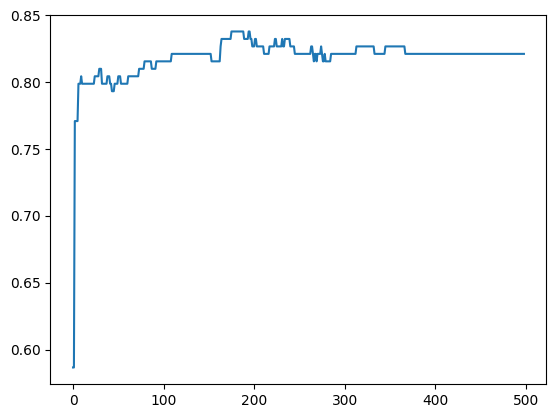

In [35]:
from tqdm import tqdm
acc_scores=[]
for i in tqdm(range(1,500)):
    gbm=GradientBoostingClassifier(n_estimators=i)
    gbm.fit(x_train,y_train)
    preds=gbm.predict(x_test)
    acc_scores.append(accuracy_score(y_test,preds))
plt.plot(acc_scores)
    
    

In [36]:
np.argmax(acc_scores)

175

In [37]:
## gradient boosting 
gbm=GradientBoostingClassifier(n_estimators=174)
gbm.fit(x_train,y_train)
test(gbm)



accuracy on test set: 0.83 and f1 score is 0.79
accuracy on train set: 0.92 and f1 score is 0.89


### 5. Stacking 

Stacking is different from all mentioned methods. In stacking we train estimators in layers, the first layer is trained to produce numbers , these numbers are then fed to the final layers called "blender" or "meta learner" uses these number as input to predict class. During training all estimators are optimised.
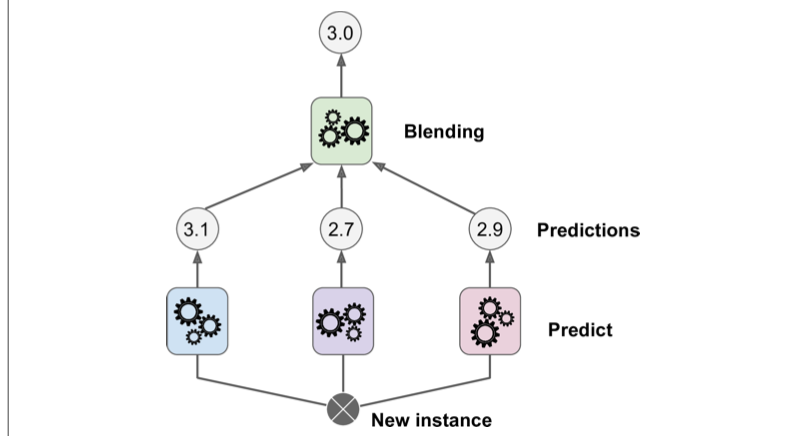






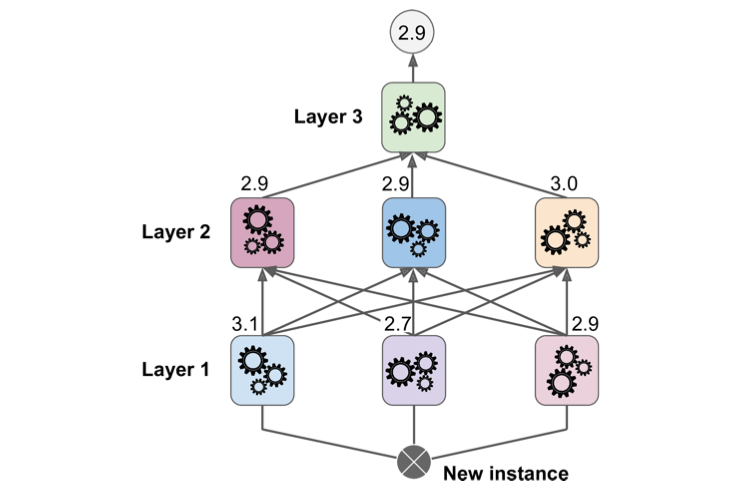

In [38]:
stack_model=StackingClassifier(estimators=[("svc",SVC(probability=True)),
                                    ("tree",DecisionTreeClassifier()),
                                    ("knn",KNeighborsClassifier())],
                              final_estimator=SVC())
stack_model.fit(x_train,y_train)

StackingClassifier(estimators=[('svc', SVC(probability=True)),
                               ('tree', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=SVC())

In [39]:
test(stack_model)

accuracy on test set: 0.80 and f1 score is 0.73
accuracy on train set: 0.83 and f1 score is 0.74
